In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
from PIL import Image

In [3]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\91895\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\91895\.keras-ocr\crnn_kurapan.h5


In [5]:
imgpath="C:\MajorProject\image_part_001 (22).png"

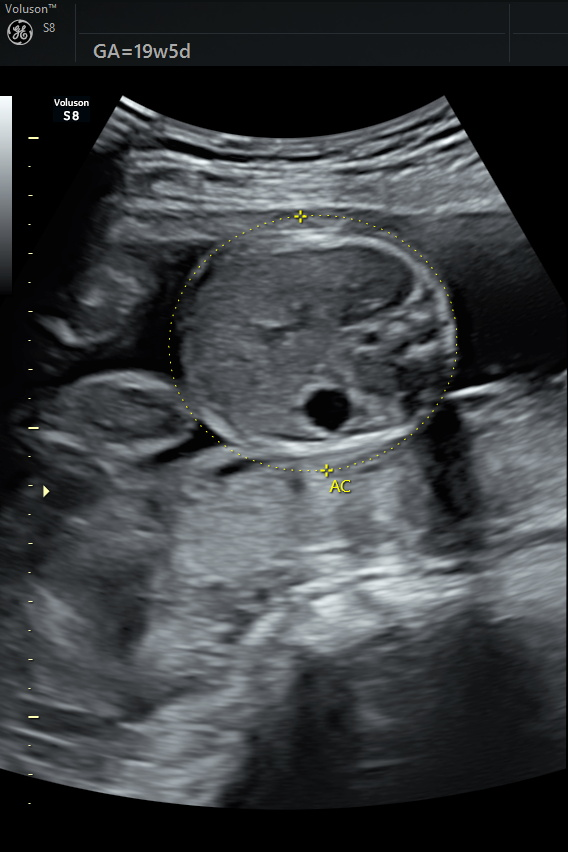

In [6]:
Image.open("C:\MajorProject\image_part_001 (22).png")

In [7]:
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

In [8]:
img=inpaint_text(imgpath,pipeline)

1/1 [==============================] - 2s 2s/step


In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('text_free_image.jpg',img_rgb)

True

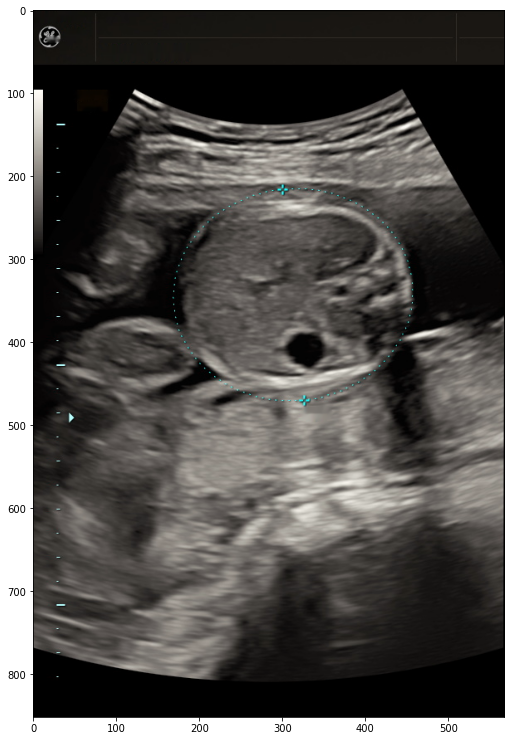

In [10]:
plt.figure(figsize=(15,13))
plt.imshow(img_rgb)